# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a linear regression model with PyTorch and perform training and prediction the linear regression problem from the previous practical. The goal of this tutorial is to understand the PyTorch framework and getting to know to use it. 

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) (data visualization library on top of matplotlib)

In [61]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler

In [62]:
torch.set_default_dtype(torch.float64)

## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [63]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()

(False, False, 0)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

![image.png](attachment:./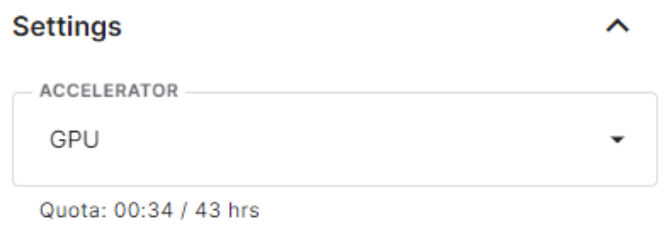)

Now check the availability again (after re-running the imports)

In [64]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

AssertionError: AssertionError: Torch not compiled with CUDA enabled

Choose your device for computation. CPU or one of your CUDA devices?

In [65]:
# DO NOT CHANGE
# use_cuda = True
use_cuda = False
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cpu


# PyTorch: Getting to know Tensors

*feel free to skip this before 'Machine Learning with Pytorch' section if you feel confident enough*   
PyTorch is a library for machine learning on arbitrary datasets, including irregular input data such as graphs, point clouds and manifolds.

In this short tutorial we will explore some of its features to handle data in tensors.
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [66]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)

Let us find out what the properties of this tensor 'a' are.

In [67]:
# TODO print the tensor
print(a)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [68]:
# TODO print its type
print(type(a))
type(a)

<class 'torch.Tensor'>


torch.Tensor

In [69]:
# TODO print its shape
print(a.shape)

torch.Size([2, 5])


In [70]:
# TODO print its size
print(a.numel())

10


In [71]:
# TODO create a new numpy array out of the tensor and print its size
new_np_arr = a.numpy()
print(new_np_arr)

[[0 1 2 3 4]
 [5 6 7 8 9]]


Let's create some new tensors.

In [72]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it
tensor_b = torch.ones((2, 5), dtype=torch.int)
print(tensor_b)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)


In [73]:
# TODO create a tensor of shape (3,4) filled with zeros and print it
tensor_c = torch.zeros((3,4))
print(tensor_c)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [74]:
# TODO transpose the tensor 'a'
# We assumed this to NOT mean to overwrite the original tensor a

a_transposed = a.T
print(a)
print(a_transposed)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


Now change a value in the numpy array. Does the corresponding tensor change?

In [75]:
# TODO change value in numpy array and inspect the tensor a

# Preparation
numpyarray_cp = numpyarray
numpyarray_cp_2 = numpyarray
a_cp = a
a_cp_2 = a

# First question
print("Original array: ", numpyarray_cp)
print("Original tensor: ", a_cp)
# change the array
numpyarray[1][1] = 0
print("Changed array: ", numpyarray)
print("Potentially changed tensor: ", a)

print()


# Second question
print("Original tensor: ", a_cp_2)
print("Original array: ", numpyarray_cp_2)
# change the tensor
a_cp[0][1] = 0
print("Changed tensor: ", a_cp)
print("Potentially changed array: ", numpyarray_cp)

Original array:  [[0 1 2 3 4]
 [5 6 7 8 9]]
Original tensor:  tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
Changed array:  [[0 1 2 3 4]
 [5 0 7 8 9]]
Potentially changed tensor:  tensor([[0, 1, 2, 3, 4],
        [5, 0, 7, 8, 9]])

Original tensor:  tensor([[0, 1, 2, 3, 4],
        [5, 0, 7, 8, 9]])
Original array:  [[0 1 2 3 4]
 [5 0 7 8 9]]
Changed tensor:  tensor([[0, 0, 2, 3, 4],
        [5, 0, 7, 8, 9]])
Potentially changed array:  [[0 0 2 3 4]
 [5 0 7 8 9]]


**TODO Your answer here** 

Yes, the corresponding vector changes and adapts the same values as in the array it is created from.


///
///
///





Does it work the other way round as well?

**TODO Your answer here** 

Yes, it does.

Now we want to make use of the different devices available, namely cpu and gpu.

In [76]:
# TODO move 'a' to the gpu

# copy from a, which is per definition using cpu, to a tensor on gpu

a_gpu = a.cuda()
print(a)
print(a_gpu) # the "device='cuda:0'" indicates device is gpu

#change cpu tensor values

a[0][2] = 0
print(a)
print(a_gpu)

AssertionError: AssertionError: Torch not compiled with CUDA enabled

If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?

**TODO Your answer here** 

No, it does not change. This is because GPU and CPU do not share their memory. Thus, to synchronize, we would need to call the cuda() method, or some similiar method, as above.

# Machine Learning with Pytorch

The process of training and evaluating a machine learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images. As Pytorch does not have in-build preprocessing for data panels we have to define our custom normalization inside a Dataset or Dataloader.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook using linear regression as an example.

## Data Loading and Preprocessing

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data.

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results.  

Usually, train and test datasets are already split in the provided kaggle datasets but as we work with a custom dataset, we would have to make train-test split ourselves first.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
test_size = 0.2
target_clm='critical_temp'

In [79]:
# TODO: load data - same as in the previous practical and make train_test_split from sklearn
data = pd.read_csv('superconduct_train.csv')
train, test = train_test_split(data, test_size=test_size)

### Dataset

PyTorch has 2 entities to load data. They are **Dataset** and **Dataloader**.
**Dataset** is a class, which defines your data and often applies data preprocessing transformations, like normalization. It should have at least 3 functions :
* __init__ - as any other init. Usually, you would provide path to dataset here or dataset elements.
* __len__ - should return the whole dataset size
* __getitem__ - this function returns 1 pair of data and label, also here preprocessing transformations are usually applied



For the next exercise, take a look here for an example https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

In [80]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        TODO: save params to self attributes,
        x is data without target column
        y is target column
        transform df to_numpy
        '''
        self.x = df.drop(target_clm, axis=1).to_numpy()
        self.y = df[[target_clm]].to_numpy()
        self.mean = mean
        self.std = std
        self.normalise = normalise

    def __len__(self):
        # TODO: return whole dataset length
        return len(self.x)#.shape[0]

    def __getitem__(self, index):
        data = self.x[index]
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std
        return data, self.y[index]

In [81]:
tmp_dataset = Dataset(train, target_clm, normalise=False)

In [82]:
# TODO calculate the mean and standard deviation of the train dataset
mean_train = train.drop(target_clm, axis=1).mean(axis=0).values
std_train = train.drop(target_clm, axis=1).std(axis=0).values
#mean_train = np.mean(train)
#std_train = np.std(train)

In [83]:
# TODO define new datasets with mean, std and normalise=True
conductor_train = Dataset(train, target_clm, mean=mean_train, std=std_train, 
                          normalise=True)
conductor_test = Dataset(test, target_clm, mean=mean_train, std=std_train, 
                          normalise=True)

We need to **split** the train dataset in two sets, one for training and one for validation.
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure that train and test splits are same across different model runs.

In fact, the good practice is to fix a global random seed not only the generator seed for even better reproducibility with `torch.manual_seed(0)`.
Machine learning models often involve random initialization of weights, augmentations, dropout layers, and other stochastic processes. Without fixing the random seed, each run of the model may produce slightly different results, making it challenging to reproduce specific results or debug issues.

In [84]:
torch.manual_seed(0)

In [85]:
# TODO split the train dataset in conductor_train and conductor_val
conductor_train, conductor_val = torch.utils.data.random_split(conductor_train, [int(0.9 * len(conductor_train)), int(0.1 * len(conductor_train))], generator=torch.Generator().manual_seed(16))

In [86]:
conductor_val

In [87]:
batch_size = 256

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
**Dataloader** calls \_\_getitem__ function from the Dataset and forms the batches.


Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [88]:
# TODO create dataloader for training, validation and test
train_dataloader = DataLoader(conductor_train, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(conductor_val, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(conductor_test, batch_size=batch_size, shuffle=True)

Let's get a data point now to see what we're dealing with.

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [89]:
# TODO get an element of the train_dataloader

element = next(iter(train_dataloader))
print(element[0])

tensor([[-0.7667, -0.4576,  0.4548,  ...,  2.5529, -0.0498,  0.2448],
        [ 1.3180,  0.3378, -0.3603,  ..., -0.5068,  0.5470,  0.7421],
        [-1.4616, -1.2790, -0.7017,  ..., -1.0131, -0.7033, -0.3835],
        ...,
        [-2.1565, -0.4987, -0.0086,  ..., -1.5284, -1.7357, -1.4818],
        [-0.7667, -0.7828,  0.1727,  ...,  2.1304, -0.0498,  0.2857],
        [ 0.6231,  0.5100, -0.4602,  ..., -0.5674, -0.0839, -0.2422]])


In [90]:
# TODO print the dimensions of for elements from the previous step
# We assumed this TODO to correctly be 'print the dimnesions of all elements from the previous step'

print("batch_data shape: ", element[0].shape)
print("batch_target shape: ", element[1].shape)

batch_data shape:  torch.Size([256, 81])
batch_target shape:  torch.Size([256, 1])


x has size (\[batchsize\], 81) --> 256 elements/batches (or whatever you have defined in your data loader), 81 feature values.

y has size (\[batchsize\], 1) --> 256 elements/batches (again depends on your data loader config). There's one target value for each set of the features.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training input row.

Before, we set some variables:
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and
- the learning rate.

In [91]:
epochs = 15
input_dim = 81
output_dim = 1
lr = 0.001

In [92]:
class LinearRegression(torch.nn.Module):
    """
    Linear regression model inherits the torch.nn.Module
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LinearRegression, self).__init__()
        # TODO define linear layer for the model
        self.linear = torch.nn.Linear(input_dim, output_dim)




    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.view(-1, input_dim)
        if torch.isnan(x).any() or torch.isinf(x).any():
            raise ValueError("Input data contains NaN or inf values.")
        # TODO run the data through the layer
        outputs = self.linear(x)
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            raise ValueError("Model output contains NaN or inf values.")
        #print(outputs.shape)
        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [93]:
# TODO instantiate the model
model = LinearRegression(input_dim, output_dim)

Feed the model to the GPU if available.

In [94]:
# TODO move model to device you specified above
model = model.to(device)

Put the model in training mode.

In [95]:
# TODO put the model in train mode
model.train()

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

### Define a Loss Function

Since we're dealing with regression problem, [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is the canonical choice for the loss.

In [99]:
# TODO define the loss function
loss_function = torch.nn.MSELoss() 

In [100]:
for name, param in model.named_parameters():
    print(f"Parameter name: {name}")
    print(f"Parameter shape: {param.shape}")
    print(f"Parameter values: {param}")
    print("--------------------------------------------------")

Parameter name: linear.weight
Parameter shape: torch.Size([1, 81])
Parameter values: Parameter containing:
tensor([[-0.0090,  0.0935,  0.0322,  0.0647, -0.0714, -0.0331,  0.0181, -0.0471,
         -0.0105, -0.0718, -0.0322,  0.0271, -0.0040, -0.0132, -0.0206, -0.0655,
          0.0367,  0.0633, -0.0644,  0.0393, -0.0867,  0.0053, -0.0609,  0.0129,
          0.0195,  0.0404,  0.0545, -0.0605,  0.0689,  0.0290, -0.0676, -0.0772,
         -0.0041,  0.0928,  0.0160, -0.0043,  0.0658, -0.0293, -0.0506, -0.1019,
          0.0553, -0.0352,  0.0085, -0.0075,  0.0808, -0.1020,  0.1105,  0.0844,
          0.0584, -0.0542, -0.0690,  0.1084,  0.0621, -0.0307,  0.0146,  0.0536,
         -0.1101,  0.0186,  0.0155, -0.1004, -0.0749,  0.1108,  0.0224, -0.0780,
         -0.0235,  0.0808, -0.0864,  0.0688,  0.0642,  0.0661, -0.0207,  0.0497,
         -0.1085, -0.0541, -0.0692, -0.0750, -0.0011, -0.0768, -0.0601, -0.0199,
         -0.0280]], requires_grad=True)
-------------------------------------------

## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the elements of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

### First, let's do all of the steps manually, without using the optimizer

**Hints:**
* define number of epochs to see the dynamic. You need to see the effect over several epochs but it should no be too long. 
* use learning rate defined above as `lr`
* when doing parameters update - do it under `with torch.no_grad():`. This would disable the gradient computation for the operations under it. And we don't need gradients for updating the weights step.
* you need to update the model parameters. See [here](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html) for more details on how to access them
* don't forget to track the learning (loss)

In [101]:
num_epochs = 10

In [102]:
## TODO do a simple for-loop to illustrate how the gradient updates if done over batches. 
## Print loss values across epochs to compare with the PyTorch optimizers later

gradients = []
epoch_losses = []
for epoch in range(num_epochs): # one epoch is one training on the entire training set
    batch_losses = 0.0 #initialize epoch loss to keep track of it
    for i, (batch,label) in enumerate(train_dataloader):
        model.zero_grad()
        #print("BATCH", batch.shape)
        outputs = model(batch) #forward pass
        #print("OUTPUTS",outputs)
        loss = loss_function(outputs, label) #calculate loss
        #print("SINGLE LOSS",loss)
        gradients.append(loss.item())
        batch_losses += loss.item() #summing up the losses of this epoch for building the average later on
        
        #Backward pass
        #reset gradients
        loss.backward() #Compute gradients

        #updating the parameters manually, using no_grad to speed up calculations
        with torch.no_grad():
            model.linear.weight -= lr*model.linear.weight.grad
            model.linear.bias -= lr*model.linear.bias.grad

    #after going through the entire test set once, i.e. after an epoch is completed, we calculate epoch mean loss
    epoch_loss_average = batch_losses/len(train_dataloader) #len == 60the lenght is the number of batches, thus this is equivalent to the loss mean of the epoch
    epoch_losses.append(epoch_loss_average) #keeping track over all epochs

for i in range(len(epoch_losses)):
    print(f"Loss value for epoch {i}:", epoch_losses[i])

Loss value for epoch 0: 1704.4706914795765
Loss value for epoch 1: 1338.5563048256097
Loss value for epoch 2: 1134.9129559050514
Loss value for epoch 3: 981.0160355124628
Loss value for epoch 4: 861.9178673992556
Loss value for epoch 5: 767.5377592946007
Loss value for epoch 6: 693.8252854717814
Loss value for epoch 7: 634.7058310184267
Loss value for epoch 8: 587.6565604555682
Loss value for epoch 9: 550.0640438715062


This was equivalent to SGD optimizer

### Now let's do it in the pytorch style using the optimizer  

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).
Redefine the model and initialize SGD optimizer

In [103]:
# TODO Redefine the model and initialize SGD optimizer, write a train loop as above and compare the loss values
model = LinearRegression(input_dim, output_dim)
model = model.to(device)

In [104]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [105]:
training_losses_all = [] #used for a later exercise
training_losses_average = [] #used for a later exericse
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i, (inputs, targets) in enumerate(train_dataloader):

        optimizer.zero_grad()
        # Move batch data to device (GPU)
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass: compute predicted outputs
        outputs = model.forward(inputs)
        
        # Compute loss: mean squared error
        #loss = torch.mean((outputs - targets)**2)
        loss = loss_function(outputs, targets)
        epoch_loss += loss.item()  # Accumulate loss for the epoch
        training_losses_all.append(loss.item()/len(train_dataloader)) #used for later exercise
        # Backward pass: compute gradients
        loss.backward() #backwards pass
        
        # Update model parameters using optimizer
        optimizer.step()
        
    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg. Loss: {epoch_loss / len(train_dataloader):.4f}")
    training_losses_average.append(epoch_loss) #used for later exercise

Epoch [1/10], Avg. Loss: 1703.4792
Epoch [2/10], Avg. Loss: 1334.9035
Epoch [3/10], Avg. Loss: 1131.7753
Epoch [4/10], Avg. Loss: 978.8468
Epoch [5/10], Avg. Loss: 859.1062
Epoch [6/10], Avg. Loss: 766.0929
Epoch [7/10], Avg. Loss: 691.6985
Epoch [8/10], Avg. Loss: 632.9005
Epoch [9/10], Avg. Loss: 586.3170
Epoch [10/10], Avg. Loss: 549.0495


### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen data row from the test dataset.

Run this cell several times, does the model predict accurately?

Set the number of epochs to 15 during training and try again!

Hell yeah! Approaches 50% over large numbers.

In [106]:
# TODO get a random element of the test dataloader
x = random.randint(0, len(val_dataloader)-1) #len(test_dataloader) == 17

for i, batch in enumerate(val_dataloader):
    if i == x:
        random_batch = batch
        break #this stops the for loop, so we dont do more comparisons than necessary
random_data, random_label = random_batch #split the batch
# TODO make a prediction
with torch.no_grad():
    prediction = model(random_data)

# print predicted label and given label
print(f"Transposed given label: {random_label.transpose(0,1)} vs. Transposed predicted label: {prediction.transpose(0,1)}")
print(f"Random batch first row: {random_label[0]} vs predicted first row: {prediction[0]}")

Transposed given label: tensor([[3.4000e+00, 3.5000e+00, 1.6800e+00, 4.0500e+00, 2.2000e+01, 2.6700e+01,
         9.8500e+01, 1.8000e-01, 6.2600e+00, 6.2700e+01, 5.5000e-01, 2.6200e+01,
         2.8000e+01, 9.2800e+01, 3.9000e+00, 2.3000e+01, 8.9200e+01, 4.7100e+00,
         4.2900e+00, 6.0000e+00, 3.2800e+00, 8.1300e+00, 1.0000e+01, 8.7300e+01,
         2.9000e+00, 3.6600e+00, 4.7000e+00, 4.0000e+01, 1.8200e+01, 5.8000e+00,
         8.8000e+00, 1.0400e+01, 2.5000e+01, 1.4000e+01, 2.0000e+01, 2.3400e+00,
         5.0000e+00, 5.9400e+00, 5.4000e+00, 1.1590e+00, 2.0400e+01, 9.6000e+01,
         4.1500e+01, 7.5000e+01, 3.3000e+01, 8.6400e+01, 1.7400e+01, 9.0900e+00,
         1.7300e+01, 1.1000e+00, 4.7600e+01, 7.2200e+01, 1.0690e+02, 9.8000e+01,
         3.7000e+01, 8.6000e+00, 3.8300e+01, 1.5000e+01, 5.3000e+01, 3.0500e+01,
         2.9200e+00, 1.0600e+01, 1.6100e+01, 7.5700e+01, 2.9570e+01, 8.6900e+01,
         4.0000e+01, 8.6000e+01, 1.1000e+02, 7.3000e+01, 2.8000e+01, 1.4100e+01,
    

### Track and Plot the Training and Validation error

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.

The plot should look similar to this:


![image.png](attachment:./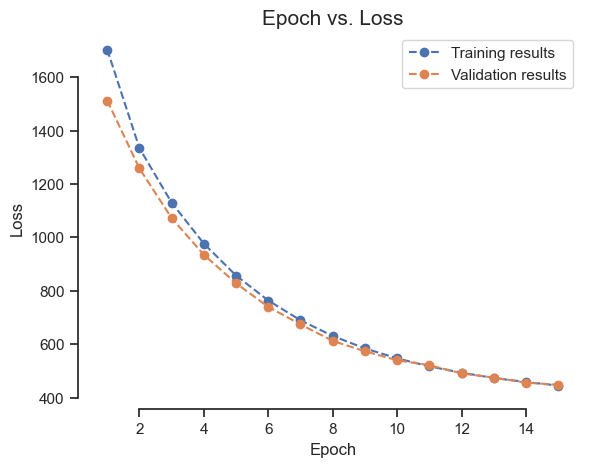)


**Note:** Do not forget to add title, axis labels and a legend!\
This applies in general, please keep in mind for future exercise sheets.

In [107]:
# TODO refine the training function from above
# it should contain:
# - saving of losses
# - returning the mean loss
print("Done, see above for implementation and below for results:")
print("Length of training_losses_all:", len(training_losses_all))
print("All loss averages of the training epochs:", training_losses_average)

Done, see above for implementation and below for results:
Length of training_losses_all: 600
All loss averages of the training epochs: [102208.75105917253, 80094.21034780846, 67906.51940658364, 58730.80523374299, 51546.37139390085, 45965.57423362312, 41501.91009635196, 37974.031677058985, 35179.019405226296, 32942.97030098737]


In [108]:
# you can also combine it with the training function
def train_and_test_or_val(model, train_dataloader, val_dataloader, loss_function, optimizer,epochs):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        ###### TRAINING
        model.train() #Set model to training mode
        train_loss = 0.0
        val_loss = 0.0
    
        for i, (inputs, labels) in enumerate(train_dataloader):
            #Prediction and Loss
            optimizer.zero_grad()

            prediction = model(inputs) #forward 
            loss = loss_function(prediction, labels)
            train_loss += loss.item()
            
            #backwards
            loss.backward()
            optimizer.step()
            
        
        train_loss = train_loss/len(train_dataloader)
        train_losses.append(train_loss)

        ##### VALIDATION
        model.eval() #Set model to evaluation mode        
        with torch.no_grad(): #forward pass, loss, accumulate loss
            for i, (inputs, labels) in enumerate(val_dataloader):
                prediction = model(inputs) #forward pass
                loss = loss_function(prediction, labels) #loss
                val_loss += loss.item() #accumulate loss
        
        val_loss = val_loss/len(val_dataloader) #mean
        val_losses.append(val_loss)
    return train_losses,val_losses
        

In [109]:
def run_training(num_epochs, model, train_dataloader, val_dataloader, loss_function, optimizer):
    #arrays for saving and returning
    train_losses = [] 
    val_losses = []

    #loopen
    for i in range(num_epochs):
        tloss, vloss = train_and_test_or_val(model, train_dataloader, val_dataloader, loss_function, optimizer, epochs=1)
        train_losses.append(tloss[0])
        val_losses.append(vloss[0])
        
    return np.array(train_losses), np.array(val_losses)

def restart_model(model):
    for param in model.parameters():
        if param.requires_grad:
            param.data.uniform_(-0.1, 0.1)
restart_model(model)
#call the run_training function and run it for 10 epochs
num_epochs = 15

train_losses, val_losses = run_training(num_epochs, model, train_dataloader, val_dataloader, loss_function, optimizer)

In [110]:
print(train_losses)
print(val_losses)

[1701.17635434 1334.90893213 1131.43994343  978.8310394   858.97310157
  765.30886117  691.87861272  633.38907235  586.3553313   549.4336671
  519.47811267  495.28405322  475.95255312  460.54670165  447.2591379 ]
[1452.26364443 1215.79584907 1043.83974154  917.50032181  804.78954829
  721.66413452  658.16483221  607.60873889  560.58705647  529.90976348
  503.58247326  480.21558865  465.45136799  451.5893437   437.3528431 ]


In [111]:
# TODO write a plot function
def plot_losses(num_epochs, train_losses, val_losses):
    epochs = list(range(num_epochs))
    sns.set(style="white")
    plt.plot(epochs, train_losses, marker='o', linestyle='--', label="Training Loss")
    plt.plot(epochs, val_losses, marker='o', linestyle='--', label="Validation Loss")
    
    plt.title("Training and Validation Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    sns.despine()
    plt.show()

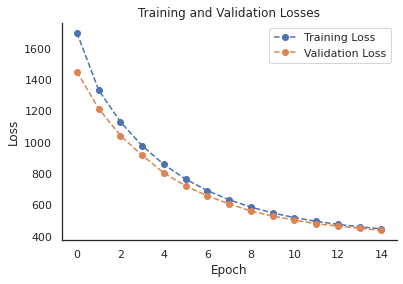

In [112]:
# TODO plot losses
#Test values because real ones didnt work
#train_losses = [0.1, 0.08, 0.06, 0.05]  # Example training losses
#val_losses = [0.2, 0.18, 0.15, 0.12]    # Example validation losses
#num_epochs = 4

plot_losses(num_epochs, train_losses, val_losses)

Comment on the loss curve. Does it look as expected? Why/Why not?
If not, what might be the reason.

# Hyperparameters influence

Now, once we successfully reproduced linear regression using PyTorch, lets explore the hyperparameters influence, such as learning rate or batch size.

Train several models with 30 train epochs and using different learning rates - [0.0001, 0.001, 0.01, 0.1, 1, 10].
What do you notice? Why?

*Hints*: 
* Do not forget to reinitialize models and update the optimizers
* Use different colors and line styles to display different learning rates and train-validation splits

In [125]:
num_epochs = 30
## TODO - train models with different learning rates
learning_rates = [0.0001, 0.001, 0.01]
all_epochs_train_losses = []
all_epochs_val_losses = []

for lr in learning_rates:
    restart_model(model)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    train_losses, val_losses = run_training(num_epochs, model, train_dataloader, val_dataloader, loss_function, optimizer)
    print(train_losses)
    print(val_losses)
    all_epochs_train_losses.append(train_losses)
    all_epochs_val_losses.append(val_losses)



[2176.14472211 1937.33595537 1805.16791945 1721.26039095 1661.82089197
 1615.59346529 1575.86019131 1541.40791734 1508.40271252 1478.35547196
 1449.17953168 1422.34659312 1395.74853634 1370.32393355 1344.87340851
 1321.88643661 1297.94331252 1276.34683296 1255.35446839 1234.8396561
 1214.613622   1195.40122758 1176.09784082 1157.7097343  1140.02282225
 1122.56342018 1105.49495266 1089.34573526 1073.1170375  1057.23589537]
[2046.84248231 1855.52472017 1745.33355584 1707.44961401 1627.74207653
 1588.91035249 1553.21123759 1519.27885083 1485.45580949 1457.97330598
 1427.70687708 1403.05764149 1389.07834537 1359.7351058  1340.60441847
 1317.14491884 1300.48710688 1269.36785963 1238.27968637 1216.99360824
 1204.32615271 1179.45298125 1168.0156436  1148.75681426 1132.49998733
 1115.6612892  1092.72377638 1074.94742112 1058.76326011 1051.89291672]
[1699.72102132 1333.34111265 1129.81833604  978.12767702  857.98125596
  765.11848762  691.25290934  633.3889171   586.28204446  548.99793268
  519

In [126]:
all_epochs_train_losses

[array([2176.14472211, 1937.33595537, 1805.16791945, 1721.26039095,
        1661.82089197, 1615.59346529, 1575.86019131, 1541.40791734,
        1508.40271252, 1478.35547196, 1449.17953168, 1422.34659312,
        1395.74853634, 1370.32393355, 1344.87340851, 1321.88643661,
        1297.94331252, 1276.34683296, 1255.35446839, 1234.8396561 ,
        1214.613622  , 1195.40122758, 1176.09784082, 1157.7097343 ,
        1140.02282225, 1122.56342018, 1105.49495266, 1089.34573526,
        1073.1170375 , 1057.23589537]),
 array([1699.72102132, 1333.34111265, 1129.81833604,  978.12767702,
         857.98125596,  765.11848762,  691.25290934,  633.3889171 ,
         586.28204446,  548.99793268,  519.47996078,  495.32033275,
         475.68685381,  460.10265215,  447.35947964,  436.98566406,
         428.19560991,  421.28444143,  415.22075657,  409.47235595,
         405.12873344,  401.3632903 ,  398.19810739,  395.13418223,
         392.61941519,  390.62461257,  388.52120686,  386.58573317,
        

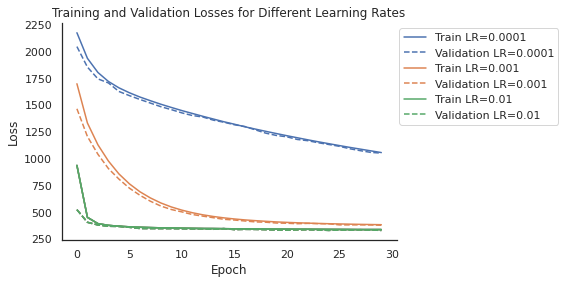

In [127]:
## TODO plot the losses from different models. What do you see and why?
labels = []
for i, lr in enumerate(learning_rates):
    plt.plot(all_epochs_train_losses[i], color=f"C{i}", linestyle='-')
    plt.plot(all_epochs_val_losses[i], color=f"C{i}", linestyle='--')
    train_label = f"Train LR={lr}"
    val_label = f"Validation LR={lr}"
    if train_label not in labels:
        plt.plot(train_losses, label=train_label, color=f"C{i}", linestyle='-')
        labels.append(train_label)
    else:
        plt.plot(train_losses, color=f"C{i}", linestyle='-')
    if val_label not in labels:
        plt.plot(val_losses, label=val_label, color=f"C{i}", linestyle='--')
        labels.append(val_label)
    else:
        plt.plot(val_losses, color=f"C{i}", linestyle='--')

legend_labels = []
for lr in learning_rates:
    legend_labels.append(lr)
sns.set(style="white")
plt.title("Training and Validation Losses for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.5, 1))
sns.despine()
plt.show()

## How do we know the amount of epochs and best learning rates?

The honest answer - we just try it out. The heuristics, which are typically used are the following
* use adaptive optimizers. Adam would be a typical example. It is an adaptive learning rate optimization algorithm that is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients. More details [here](https://paperswithcode.com/method/adam). This makes the training more robust to the choise of the the learning rate
* Use schedulers for the training. They change the value of the learning rate based on the loss behaviour. The most typical ones are
  * Early stopper . The early stopper is helpful to avoid redundunt computations and overfitting. It basically stops the train loop if the loss function does not decrease on the validation split for some time.
  * Warm up. Warm up slowly increases the learning rate in the begining of the training. This helps to avoid bad influence of not-so-good initialisation and especially helpful for the layers, which need to accumulate statistics, such as BatchNorm. We will use such layers later in the course.

### Task
Modify the the training function with the early stopper logic.
This should stop the training loop if the validation loss function does not improve over $N$ epochs. The improvement is only something, which is better than the $tol$ value, which stays for the tolerance.

Use $tol=2$, $N=5$, $num\_epochs=150$, $lr=0.01$ for the function start.

**Question**:
* Can $tol=0$? Why?
* How many epochs it would really run? Try to change the $lr=0.001$ and $lr=0.0001$ and see when this would stop.
* What happens if you increase the tolerance?
* What if you increase $N$?

In [131]:
## TODO: adopt the train function with the early stopper logic
def run_training_adapted(tolerance, num_epochs, model, train_dataloader, val_dataloader, loss_function, optimizer):
    #arrays for saving and returning
    train_losses = []
    val_losses = [] 
    stop_counter = 0
    
    for i in range(num_epochs):
        train_loss, val_loss = train_and_test_or_val(model, train_dataloader, val_dataloader, loss_function, optimizer,epochs=1)
        train_losses.append(train_loss[0])
        val_losses.append(val_loss[0])
        
        if (train_loss[0] > tolerance):
            stop_counter += 1
            if (stop_counter > 5):
                break
        else: stop_counter = 0
        
        
    return np.array(train_losses), np.array(val_losses)

In [132]:
## TODO: Train models with early stopping with the different learning rates
all_epochs_train_losses_adapted = []
all_epochs_val_losses_adapted = []

for lr in learning_rates:
    restart_model(model)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    train_losses, val_losses = run_training_adapted(2, num_epochs, model, train_dataloader, val_dataloader, loss_function, optimizer)
    all_epochs_train_losses_adapted.append(train_losses)
    all_epochs_val_losses_adapted.append(val_losses)

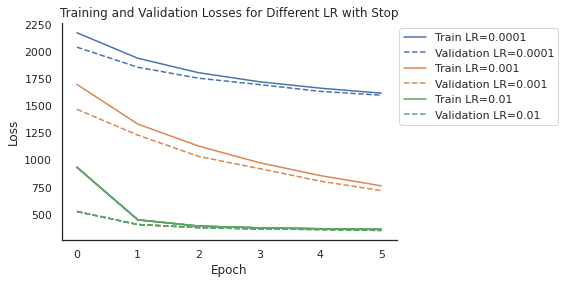

In [133]:
## TODO: Visualize the results. What do you see and why?
labels = []
for i, lr in enumerate(learning_rates):
    plt.plot(all_epochs_train_losses_adapted[i], color=f"C{i}", linestyle='-')
    plt.plot(all_epochs_val_losses_adapted[i], color=f"C{i}", linestyle='--')
    train_label = f"Train LR={lr}"
    val_label = f"Validation LR={lr}"
    
    if train_label not in labels:
        plt.plot(train_losses, label=train_label, color=f"C{i}", linestyle='-')
        labels.append(train_label)
    else:
        plt.plot(train_losses, color=f"C{i}", linestyle='-')
    if val_label not in labels:
        plt.plot(val_losses, label=val_label, color=f"C{i}", linestyle='--')
        labels.append(val_label)
    else:
        plt.plot(val_losses, color=f"C{i}", linestyle='--')
    
legend_labels = []
for lr in learning_rates:
    legend_labels.append(lr)
sns.set(style="white")
plt.title("Training and Validation Losses for Different LR with Stop")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.5, 1))
sns.despine()
plt.show()

## Now lets try to explore the impact of the batch size

**Task:** Fix $num\_epochs = 150$ and $lr = 0.001$ and try to change the batch size using values $[2, 4, 32, 128, 1024]$ for the batch size.
* What impact the batch size have? Why?

In [134]:
num_epochs = 10
lr = 0.001
## TODO: Train with different batch sizes

losses_train = []
losses_val = []
batch_sizes = [2,4,32,128,1024]
for size in batch_sizes:
    restart_model(model)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    train_dataloader = DataLoader(conductor_train, batch_size=size, shuffle=True)
    val_dataloader = DataLoader(conductor_val, batch_size=size, shuffle=True)
    train_loss, val_loss = run_training(num_epochs, model, train_dataloader, val_dataloader, loss_function, optimizer)
    losses_train.append(train_loss)
    losses_val.append(val_loss)
    

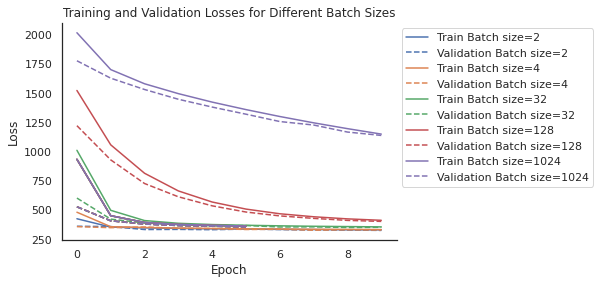

In [135]:
## TODO: Visualize the differences 
labels = []
for i, size in enumerate(batch_sizes):
    plt.plot(losses_train[i], color=f"C{i}", linestyle='-')
    plt.plot(losses_val[i], color=f"C{i}", linestyle='--')
    train_label = f"Train Batch size={size}"
    val_label = f"Validation Batch size={size}"
    
    if train_label not in labels:
        plt.plot(train_losses, label=train_label, color=f"C{i}", linestyle='-')
        labels.append(train_label)
    else:
        plt.plot(train_losses, color=f"C{i}", linestyle='-')
    if val_label not in labels:
        plt.plot(val_losses, label=val_label, color=f"C{i}", linestyle='--')
        labels.append(val_label)
    else:
        plt.plot(val_losses, color=f"C{i}", linestyle='--')
    
legend_labels = []
for lr in learning_rates:
    legend_labels.append(lr)
sns.set(style="white")
plt.title("Training and Validation Losses for Different Batch Sizes")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()
plt.show()